In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

### Configurações de pacotes

In [2]:
%matplotlib inline
np.set_printoptions(precision=4)
pd.set_option('max_colwidth', 180)
sns.set_theme(style="darkgrid")
plt.rcParams.update({'font.size': 14})

### Carga dos dados

In [3]:
colunas = ['id_ato', 'data_pub', 'tipo_ato', 'id_seg', 'tipo_seg', 'txt_seg']
df_seg = pd.read_csv('./dados/extracao-segmentos-atos.csv', delimiter='|', names=colunas, quotechar="'")

### Estrutura da fonte de dados

In [4]:
df_seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206488 entries, 0 to 206487
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id_ato    206488 non-null  int64 
 1   data_pub  206488 non-null  object
 2   tipo_ato  206488 non-null  object
 3   id_seg    206488 non-null  int64 
 4   tipo_seg  206488 non-null  object
 5   txt_seg   204588 non-null  object
dtypes: int64(2), object(4)
memory usage: 9.5+ MB


### Valores ausentes

In [5]:
print('Valores ausentes em {:5d} segmentos'.format(df_seg['txt_seg'].isna().sum()))

Valores ausentes em  1900 segmentos


In [6]:
df_seg[df_seg['txt_seg'].isna()].groupby('tipo_seg').count()['id_seg'].sort_values(ascending=False)

tipo_seg
Anexo               1778
Não Identificado      95
Fecho                 21
Ementa                 2
Artigo                 2
Título                 1
Alínea                 1
Name: id_seg, dtype: int64

#### Notas:
* 206.488 segmentos
* Valores ausentes em 1.900 segmentos, 1.778 (93,57% em segmentos do tipo anexo)
* txt_seg contém o texto dos segmentos a serem analisados
* tipo_seg é a variável alvo (classes)
* Demais atributos podem ser úteis para a análise exploratória

### Análise da quantidade de atos por tipo de ato

In [7]:
qtd_ato_por_tipo_ato = df_seg[['tipo_ato', 'id_ato']].groupby('tipo_ato')['id_ato'].nunique()
df_qtd_ato_por_tipo_ato = pd.DataFrame(qtd_ato_por_tipo_ato)
df_qtd_ato_por_tipo_ato.columns = ['qtd_ato']
df_qtd_ato_por_tipo_ato.reset_index(inplace=True)
df_qtd_ato_por_tipo_ato.sort_values(by='qtd_ato', ascending=False, inplace=True)

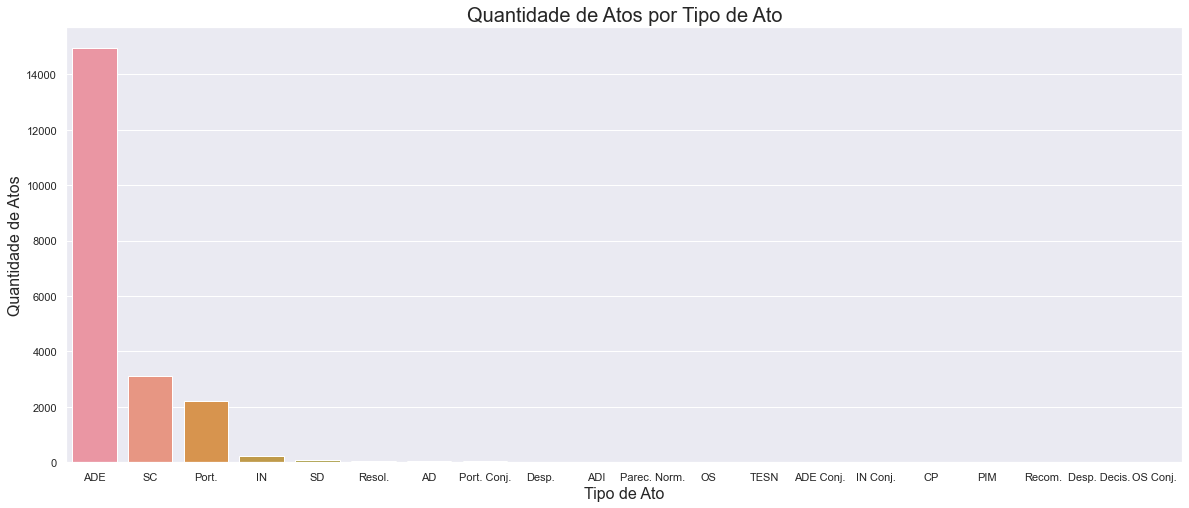

In [8]:
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(x='tipo_ato', y='qtd_ato', data=df_qtd_ato_por_tipo_ato)
ax.set_title('Quantidade de Atos por Tipo de Ato', fontsize=20)
ax.set_ylabel('Quantidade de Atos', fontsize=16)
ax.set_xlabel('Tipo de Ato', fontsize=16)
plt.show()

In [9]:
qtd_total_ato = df_qtd_ato_por_tipo_ato['qtd_ato'].sum()

qtd_ato_ade = df_qtd_ato_por_tipo_ato[df_qtd_ato_por_tipo_ato['tipo_ato'] == 'ADE']['qtd_ato'].iloc[0]
qtd_ato_sc = df_qtd_ato_por_tipo_ato[df_qtd_ato_por_tipo_ato['tipo_ato'] == 'SC']['qtd_ato'].iloc[0]
qtd_ato_port = df_qtd_ato_por_tipo_ato[df_qtd_ato_por_tipo_ato['tipo_ato'] == 'Port.']['qtd_ato'].iloc[0]
qtd_ato_menos_frequentes = df_qtd_ato_por_tipo_ato[df_qtd_ato_por_tipo_ato['qtd_ato']<1000]['qtd_ato'].sum()

perc_ato_ade = (qtd_ato_ade*100)/qtd_total_ato
perc_ato_sc = (qtd_ato_sc*100)/qtd_total_ato
perc_ato_port = (qtd_ato_port*100)/qtd_total_ato
perc_ato_menos_frequentes = (qtd_ato_menos_frequentes*100)/qtd_total_ato

In [10]:
dict_qtd_ato_por_tipo_ato = {
    'ADE': [qtd_ato_ade, perc_ato_ade],
    'SC': [qtd_ato_sc, perc_ato_sc],
    'PORT': [qtd_ato_port, perc_ato_port],
    'OUTROS': [qtd_ato_menos_frequentes, perc_ato_menos_frequentes]
}

df_qtd_ato_por_tipo_ato = pd.DataFrame(dict_qtd_ato_por_tipo_ato)
df_qtd_ato_por_tipo_ato = df_qtd_ato_por_tipo_ato.T
df_qtd_ato_por_tipo_ato.reset_index(inplace=True)
df_qtd_ato_por_tipo_ato.columns = ['tipo_ato','qtd_ato','perc_ato']
print(df_qtd_ato_por_tipo_ato)

  tipo_ato  qtd_ato   perc_ato
0      ADE  14948.0  71.792901
1       SC   3119.0  14.980068
2     PORT   2206.0  10.595072
3   OUTROS    548.0   2.631958


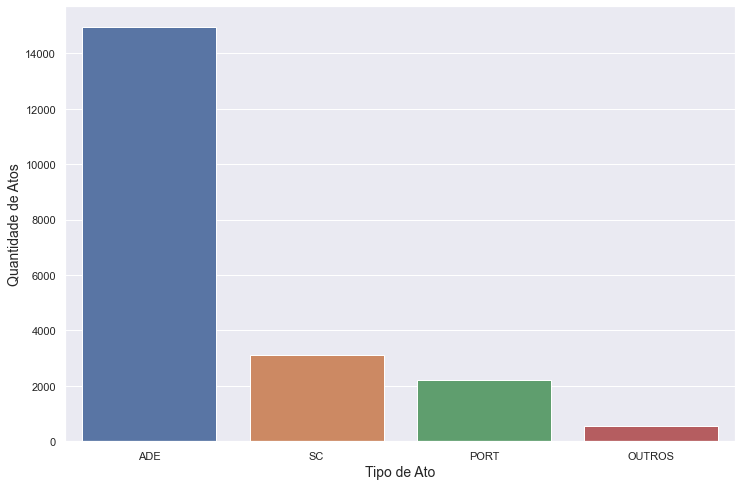

In [45]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x='tipo_ato', y='qtd_ato', data=df_qtd_ato_por_tipo_ato)
#ax.set_title('Quantidade de Atos por Tipo de Ato', fontsize=20)
ax.set_ylabel('Quantidade de Atos', fontsize=14)
ax.set_xlabel('Tipo de Ato', fontsize=14)
ax.set
plt.show()

### Análise da quantidade de segmentos por tipo de segmento

In [12]:
qtd_seg_por_tipo_seg = df_seg[['id_seg', 'tipo_seg']].groupby('tipo_seg').count().sort_values("id_seg", ascending=False)
qtd_seg_por_tipo_seg.columns = ['qtd_seg']
qtd_seg_por_tipo_seg.reset_index(inplace=True)

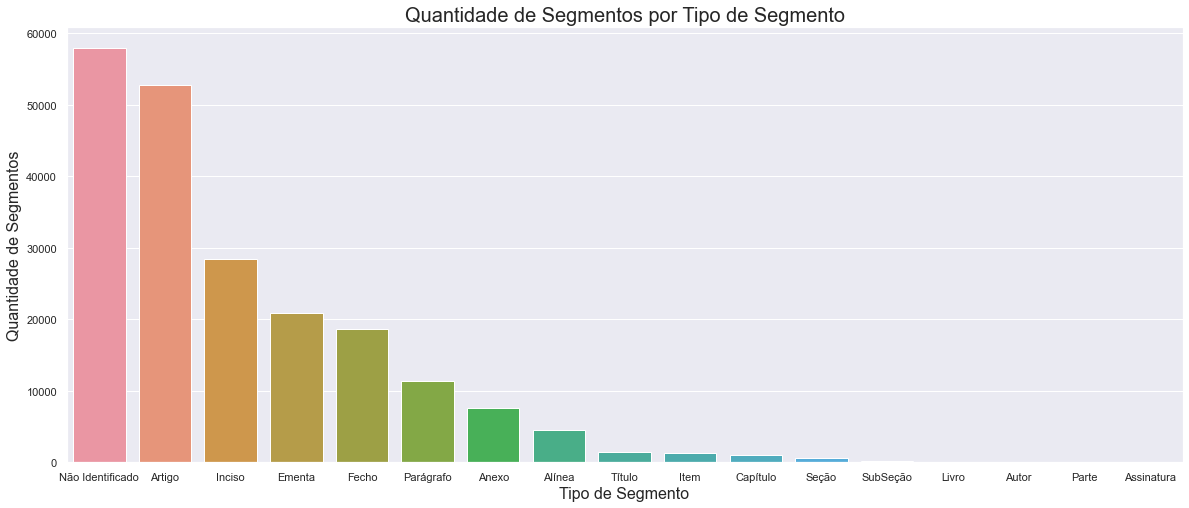

In [13]:
fig = plt.figure(figsize=(20,8))
ax = sns.barplot(x='tipo_seg', y='qtd_seg', data=qtd_seg_por_tipo_seg)
ax.set_title('Quantidade de Segmentos por Tipo de Segmento', fontsize=20)
ax.set_ylabel('Quantidade de Segmentos', fontsize=16)
ax.set_xlabel('Tipo de Segmento', fontsize=16)
plt.show()

In [14]:
qtd_seg_por_tipo_seg

,tipo_seg,qtd_seg
0,Não Identificado,57941
1,Artigo,52808
2,Inciso,28479
3,Ementa,20824
4,Fecho,18571
5,Parágrafo,11404
6,Anexo,7549
7,Alínea,4475
8,Título,1424
9,Item,1218


#### Notas:
* 17 classes
* Forte desbalanceamento entre as classes
* Algumas classes com pouca representatividade (poucas instâncias)
* Segmentos não identificados são maioria:
  * Omissão da classificação manual (segmento deveria ser de outra classe)?
  * A classe está sendo usada para alguma situação específica?
  * Segmentos que não precisam estar classificados em nenhuma outra classe?

## Análise considerando somente os atos do tipo ADE

### Carga dos dados considerando uma nova extração (somente atos ADE)

In [15]:
df_seg_ade = df_seg[df_seg['tipo_ato']=='ADE'] 

In [16]:
df_seg_ade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115040 entries, 277 to 206380
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id_ato    115040 non-null  int64 
 1   data_pub  115040 non-null  object
 2   tipo_ato  115040 non-null  object
 3   id_seg    115040 non-null  int64 
 4   tipo_seg  115040 non-null  object
 5   txt_seg   114418 non-null  object
dtypes: int64(2), object(4)
memory usage: 6.1+ MB


In [17]:
print('Valores ausentes em {:5d} segmentos.'.format(df_seg_ade['txt_seg'].isna().sum()))

Valores ausentes em   622 segmentos.


#### Notas:
* Redução do número de segmentos de 206.488 para 115.040
* Redução do número de atos de 20.821 para 14.948
* Redução dos valores ausentes de 1.900 para 622

### Tratamento de valores ausentes

In [18]:
total_seg_ade = df_seg_ade['id_seg'].count()
qtd_valores_ausentes = df_seg_ade['txt_seg'].isna().sum()
perc_valores_ausentes = qtd_valores_ausentes / total_seg_ade
print('Percentual de valores ausentes: {:5.2f}%'.format(perc_valores_ausentes*100))

Percentual de valores ausentes:  0.54%


#### Notas:
* Valores ausentes representam somente 0.54% dos valores de segmentos e podem ser excluídos.

In [19]:
# Exclusão de segmentos com valores ausentes
df_seg_ade=df_seg_ade[df_seg_ade['txt_seg'].notna()]

### Análise da quantidade de segmentos por tipo de segmento para atos ADE

In [20]:
qtd_seg_tipo_seg_ade = df_seg_ade[['id_seg', 'tipo_seg']].groupby('tipo_seg').count().sort_values("id_seg", ascending=False)
qtd_seg_tipo_seg_ade.columns = ['qtd_seg']
qtd_seg_tipo_seg_ade.reset_index(inplace=True)

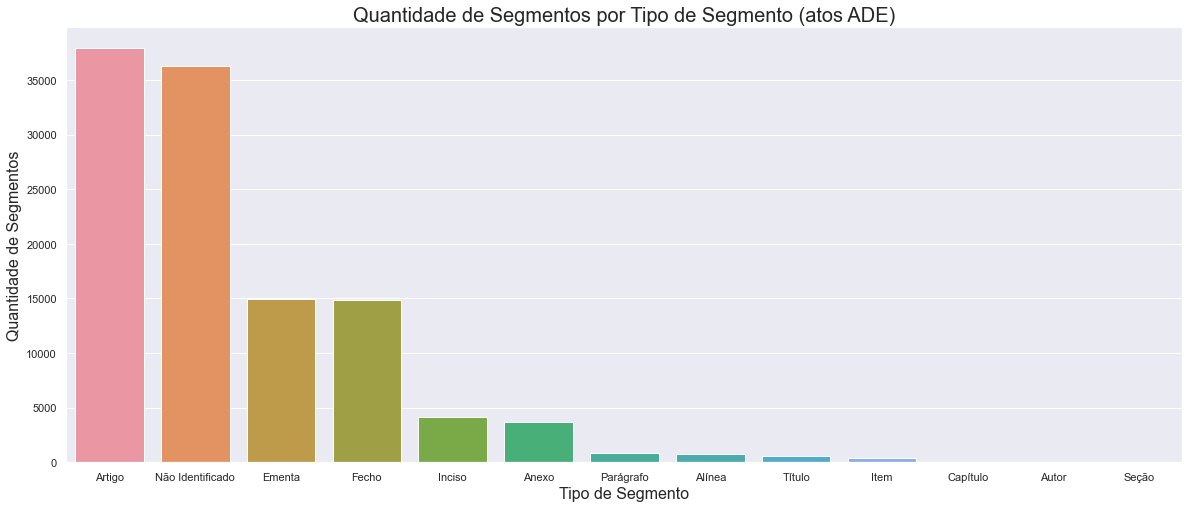

In [21]:
fig = plt.figure(figsize=(20,8))
ax = sns.barplot(x='tipo_seg', y='qtd_seg', data=qtd_seg_tipo_seg_ade)
ax.set_title('Quantidade de Segmentos por Tipo de Segmento (atos ADE)', fontsize=20)
ax.set_ylabel('Quantidade de Segmentos', fontsize=16)
ax.set_xlabel('Tipo de Segmento', fontsize=16)
plt.show()

In [22]:
qtd_seg_tipo_seg_ade

,tipo_seg,qtd_seg
0,Artigo,37921
1,Não Identificado,36288
2,Ementa,14948
3,Fecho,14853
4,Inciso,4134
5,Anexo,3679
6,Parágrafo,861
7,Alínea,780
8,Título,545
9,Item,398


### Análise da quantidade de atos (ADE) por tipo de segmento

In [23]:
qtd_ato_ade = df_seg_ade[['id_ato', 'tipo_seg']].groupby('tipo_seg')['id_ato'].nunique()
qtd_seg_tipo_seg_ade = qtd_seg_tipo_seg_ade.merge(qtd_ato_ade, how='inner', on='tipo_seg')
qtd_seg_tipo_seg_ade.rename(columns = {'id_ato':'qtd_ato'}, inplace=True)
qtd_seg_tipo_seg_ade

,tipo_seg,qtd_seg,qtd_ato
0,Artigo,37921,12679
1,Não Identificado,36288,14939
2,Ementa,14948,14948
3,Fecho,14853,14629
4,Inciso,4134,752
5,Anexo,3679,3242
6,Parágrafo,861,650
7,Alínea,780,144
8,Título,545,512
9,Item,398,163


### Comparando os resultados com todos os tipos de ato e somente com atos ADE

In [24]:
df_seg_comparativo = qtd_seg_por_tipo_seg.merge(qtd_seg_tipo_seg_ade, how='left', on='tipo_seg')
df_seg_comparativo = df_seg_comparativo.rename(columns = {'qtd_seg_x': 'qtd_seg', 'qtd_seg_y':'qtd_seg_ade'})

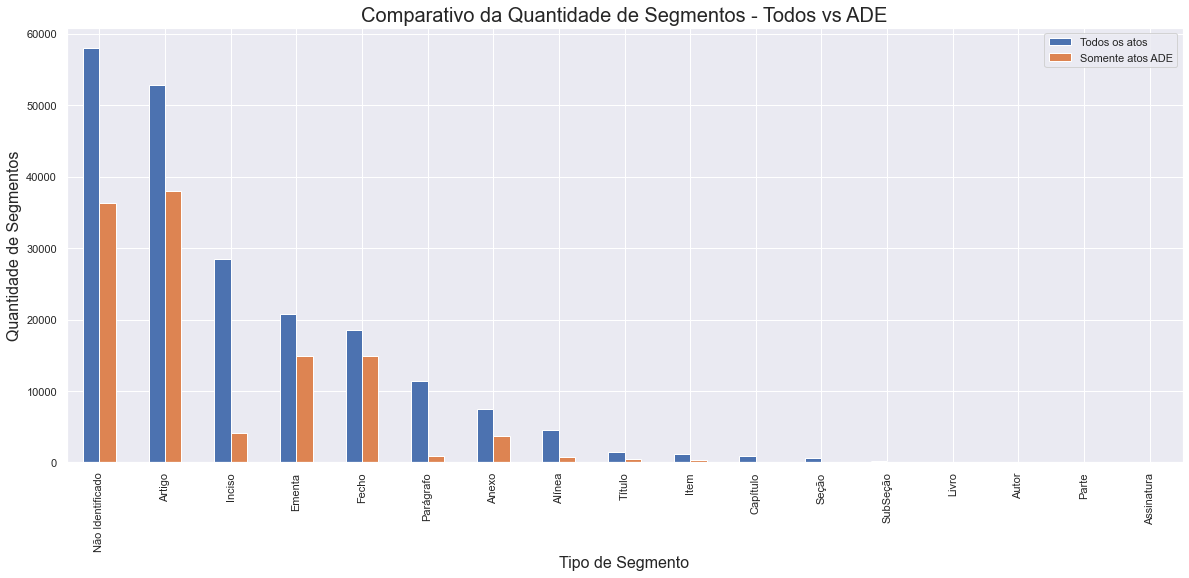

In [25]:
ax = df_seg_comparativo[['tipo_seg', 'qtd_seg', 'qtd_seg_ade']].plot(kind='bar', x='tipo_seg', figsize=(20,8))
ax.set_title('Comparativo da Quantidade de Segmentos - Todos vs ADE', fontsize=20)
ax.set_ylabel('Quantidade de Segmentos', fontsize=16)
ax.set_xlabel('Tipo de Segmento', fontsize=16)
ax.legend(['Todos os atos', 'Somente atos ADE'])
plt.show()

In [26]:
df_seg_comparativo

,tipo_seg,qtd_seg,qtd_seg_ade,qtd_ato
0,Não Identificado,57941,36288.0,14939.0
1,Artigo,52808,37921.0,12679.0
2,Inciso,28479,4134.0,752.0
3,Ementa,20824,14948.0,14948.0
4,Fecho,18571,14853.0,14629.0
5,Parágrafo,11404,861.0,650.0
6,Anexo,7549,3679.0,3242.0
7,Alínea,4475,780.0,144.0
8,Título,1424,545.0,512.0
9,Item,1218,398.0,163.0


#### Notas:
* Segmentos não identificados deixaram de ser majoritários, mas ainda carecem de uma avaliação mais detalhada
* As categorias Assinatura, Parte, Livro e Subseção não possuem segmento para atos ADE
* As categorias Parágrafo, Alínea, Título, Item, Capítuo, Autor e Seção ficaram com representatividade baixa (abaixo de 1%)

### Excluindo classes com pouca (<1%) ou nenhuma representatividade (NaN) em atos ADE

In [27]:
# Nenhuma representatividade
df_seg_comparativo.dropna(inplace=True)
df_seg_comparativo['qtd_seg_ade'] = df_seg_comparativo['qtd_seg_ade'].astype('int')

In [28]:
df_seg_comparativo['perc_seg_ade'] = df_seg_comparativo['qtd_seg_ade']/total_seg_ade

In [29]:
# Pouca representatividade
df_seg_comparativo = df_seg_comparativo[df_seg_comparativo['perc_seg_ade']>=0.01]

In [30]:
df_seg_comparativo = df_seg_comparativo.sort_values(by='qtd_seg_ade', ascending=False)

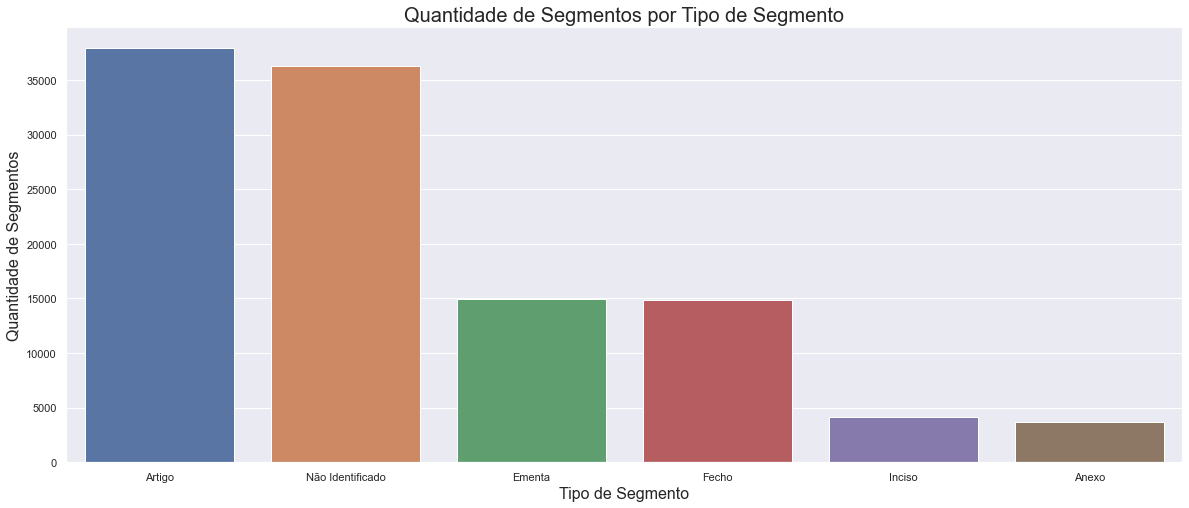

In [31]:
fig = plt.figure(figsize=(20,8))
ax = sns.barplot(x='tipo_seg', y='qtd_seg_ade', data=df_seg_comparativo)
ax.set_title('Quantidade de Segmentos por Tipo de Segmento', fontsize=20)
ax.set_ylabel('Quantidade de Segmentos', fontsize=16)
ax.set_xlabel('Tipo de Segmento', fontsize=16)
plt.show()

In [32]:
df_seg_comparativo

,tipo_seg,qtd_seg,qtd_seg_ade,qtd_ato,perc_seg_ade
1,Artigo,52808,37921,12679.0,0.329633
0,Não Identificado,57941,36288,14939.0,0.315438
3,Ementa,20824,14948,14948.0,0.129937
4,Fecho,18571,14853,14629.0,0.129112
2,Inciso,28479,4134,752.0,0.035935
6,Anexo,7549,3679,3242.0,0.031980


## Explorando os dados dos diferentes tipos de segmento

### Tipo: ARTIGO

In [33]:
df_seg_ade[df_seg_ade['tipo_seg']=='Artigo'][['id_ato','id_seg','txt_seg']].sample(15)

,id_ato,id_seg,txt_seg
20977,91291,1881842,Art. 2º - Este Ato Declaratório Executivo entra em vigor na data de sua publicação no Diário Oficial da União.
58512,95991,1935528,Art. 4º Fica suprimido da Tipi o código de classificação 0210.99.00.
26029,91919,1888534,"Art. 2º A operadora contratante, indicadora da pessoa jurídica habilitada, é PETROLEO BRASILEIRO S.A. - PETROBRÁS, CNPJ (matriz) nº 33.000.167/0001-01."
36758,93091,1903351,Art. 4º. Este ato entra em vigor na data de sua publicação.
65020,96776,1943411,"Art. 2º No caso de descumprimento do regime aplica-se o disposto no art. 311 do Decreto nº 6.759/09, e a multa prevista no art. 72, inciso I, da Lei nº 10.833/03, sem prejuízo ..."
191607,113333,2199367,"Art. 2º A habilitação acima concedida fica vinculada ao projeto aprovado pela Portaria nº 185/2020, de 20/04/2020, do Ministério de Minas e Energia, publicada no DOU de 24/04/2..."
35746,93016,1901720,"Art. 2&ordm; No caso de descumprimento do regime aplica-se o disposto no art. 311 do Decreto n&ordm; 6.759/09, e a multa prevista no art. 72, I, da Lei n&ordm; 10.833/03, sem p..."
96986,100576,1986036,Art. 2º - Este Ato Declaratório Executivo entra em vigor na data de sua publicação no DOU.
89300,99582,1974654,"Art. 1º. Nula a inscrição no Cadastro Nacional de Pessoas Jurídicas (CNPJ), nº 24.491.016/0001-02, da empresa GILBERTO DA SILVA BATISTA 00305304585."
134292,104945,2069553,Art. 3&ordm; - Este ato entra em vigor na data de sua publica&ccedil;&atilde;o no Di&aacute;rio Oficial da Uni&atilde;o.


### Notas:
* Padrão "Art. <número ordinal>" (manter ou remover o ordinal?)
* Caracteres de escape HTML eventualmente aparece no lugar do ordinal (tratar HTML escapes na limpeza)
* Presença de nomes de entidades (empresas, órgãos, pessoas, leis, impostos, etc) - Considerar a utilização de NER

### Tipo: EMENTA

In [34]:
df_seg_ade[df_seg_ade['tipo_seg']=='Ementa'][['id_ato','id_seg','txt_seg']].sample(15)

,id_ato,id_seg,txt_seg
178404,111857,2175667,Aplica a pena de perdimento de veículo objeto do processo que específica.
92580,100013,1979369,Aplica a pena de perdimento de moeda dos processos que especifica.
89272,99578,1974626,Declara nula a inscrição no Cadastro Nacional de Pessoas Jurídicas (CNPJ).
97559,100640,1986964,"Declara habilitada no regime aduaneiro especial de utilização econômica destinado a bens a serem utilizados nas atividades de exploração, desenvolvimento e produção de petróleo..."
110088,102304,2002391,"Declara nula, de ofício, a inscrição no CNPJ sob nº 23.767.803/0001-71"
171279,111134,2160543,"Concede, à pessoa jurídica que menciona HABILITAÇÃO para operar no Regime Especial de Incentivos para o Desenvolvimento da Infra-Estrutura(REIDI) de que trata a Instrução Norma..."
76233,98129,1958198,"""Nula a inscrição que menciona no Cadastro Nacional de Pessoa Jurídica – CNPJ."""
61072,96315,1938390,"Declara inscrita no Registro Especial pessoa jurídica que realiza operações com papel imune, na qualidade de gráfica."
61018,96308,1938335,Restabelecimento de Registro Especial de Papel Imune.
114100,102775,2007573,"Concede co-habilitação ao Regime Especial de Incentivos para o Desenvolvimento da Infraestrutura (REIDI). Suspensão do PIS/Pasep e da COFINS, nos casos autorizados pelos diplom..."


### Notas:
* Padrão "verbo" ou "substantivo" indicando ação (possível benefício do uso de POS-TAGGING)
* Aspas desnecessárias no início e no final de alguns segmentos (remover na limpeza)
* Caracteres de escape HTML (tratar HTML escapes na limpeza)
* Presença de nomes de entidades (empresas, órgãos, pessoas, leis, impostos, etc) - Considerar a utilização de NER 

### Tipo: FECHO

In [35]:
df_seg_ade[df_seg_ade['tipo_seg']=='Fecho'][['id_ato','id_seg','txt_seg']].sample(15)

,id_ato,id_seg,txt_seg
203957,114425,2216112,EDUARDO BADAR&Oacute; FERNANDES&nbsp;
177027,111673,2172829,SAULO FIGUEIREDO PEREIRA
143692,106281,2084632,NILO VEIGA ROLIM
147956,107056,2096184,JOSE BARROSO TOSTES NETO
156629,108550,2117987,RUY AFONSO LOPES SALDANHA
32374,92593,1896374,SAULO FIGUEIREDO PEREIRA
163599,109824,2141034,ADEMIR GOMES DE OLIVEIRA&nbsp;
34516,92843,1899649,RUY AFONSO LOPES SALDANHA
120586,103453,2015372,FERNANDA FREIRE VIRGENS
45968,94406,1918734,ORLANDO FERNANDES MARINHO


In [36]:
# Segmentos preenchido com caractere ponto sozinho
regex = '^(\.)'
segs = df_seg_ade[df_seg_ade['tipo_seg']=='Fecho']
segs[segs['txt_seg'].str.contains(regex)]['id_seg'].count()

/home/91872936504/devx/saan/.env/lib/python3.6/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


372

### Notas:
* Formado por nomes próprios em caixa alta
* Exceções:
  * 372 segmentos com caractere ponto sozinho (investigar)
  * Caracteres de escape HTML (tratar HTML escapes na limpeza)

### Tipo: INCISO

In [37]:
df_seg_ade[df_seg_ade['tipo_seg']=='Inciso'][['id_ato','txt_seg']].sample(15)

,id_ato,txt_seg
121770,103595,II - CNPJ da unidade produtiva: 20.287.659/0001- 88.
43295,94017,II - Ponto B: Lat. 12°55’00” S; Long. 36°45’00” W;
94032,100192,"II – a entrega de formulários, comunicados, requerimentos, recursos e outros documentos previstos na Instrução Normativa RFB nº 1.415, de 4 de dezembro de 2013, que trata do re..."
19147,91067,VIII – Capacidade Incentivada (anual): Indeterminada;
73346,97742,XIII – Término do prazo de fruição do benefício:31/12/2024.
166939,110467,XXV - entrega de documentos para Malha Fiscal IRPF.
81420,98732,XI - Início do prazo de fruição do benefício: 01/01/2012;
33435,92704,"IV - Unidade Flutuante de Produção (FPSO) Itaguaí/RJ - BM-S-11, Campo de LULA, latitude 25º08 28.13 S e longitude 42º56 39.54 W CNPJ 10.456.016/0029-68;"
24462,91696,"I – a restituição de capital aos sócios, em casos de redução do capital social, até o montante do aumento com incorporação da reserva; e"
101098,101071,"II - Endereço da Unidade Produtora: Fazenda AGROSOL, S/N, Zona Rural, Mossoró/RN, CEP: 59.649-899;"


### Notas:
* Padrão "número em romano - ..."
* Presença de nomes de entidades (empresas, órgãos, pessoas, leis, impostos, etc) - Considerar a utilização de NER 

### Tipo: ANEXO

In [38]:
df_seg_ade[df_seg_ade['tipo_seg']=='Anexo'][['id_ato','txt_seg']].sample(15)

,id_ato,txt_seg
171246,111130,a
199545,113949,art. 1º
177734,111767,a
19326,91098,a
95202,100377,a
118329,103187,a
123566,103856,a
109736,102267,a
136471,105178,a
108851,102147,a


In [39]:
df_seg_ade[df_seg_ade['tipo_seg']=='Anexo']['txt_seg'].unique()

array(['Novo segmento', 'a', '&nbsp;', '.', ' ', 'A', 'Anexo .html', '.a',
       'a ', 'Art. 1&ordm;', 'Art. 1&deg;', 'Anexo  .html', 'tab1',
       'art. 2&ordm;', 'art. 3&ordm;', 'art. 1º', 'anexo &uacute;nico.',
       'art. 2º', 'art. 3º', 'anexo único', 'art. 1&ordm;', 'art, 1º',
       '1.', '2.', 'Art. 2&ordm;', 'Art. 3&ordm;',
       'Hakushu 12 Y\tCaixas com 06 garrafas de 750 ml, 43% GL\t126',
       'Anexo &Uacute;nico', 'Tabela', 'Art. 2&deg;', 'Art. 3&deg;'],
      dtype=object)

### Notas:
* Os textos dos segmentos do tipo Anexo não possuem relação com o conteúdo do anexo. Como o anexo é armazenado como um arquivo binário, os textos dos segmentos não possuem valor para a classificação do segmento. 
* Por conta dessa característica específica, o tipo de segmento Anexo não será considerado no escopo da classificação. 

In [40]:
# Exclusão dos segmentos do tipo Anexo
df_seg_comparativo = df_seg_comparativo[df_seg_comparativo['tipo_seg']!='Anexo']

### Tipo: NÃO IDENTIFICADO

In [41]:
segs = df_seg_ade[df_seg_ade['tipo_seg']=='Não Identificado'][['id_seg','txt_seg']]
#segs.sample(15)
segs.count()

id_seg     36288
txt_seg    36288
dtype: int64

In [42]:
# Padrão com 4 ou mais caracteres de ponto em qualquer trecho do segmento
regex = '(\.{4,})'
segs[segs['txt_seg'].str.contains(regex)].count()['id_seg']

/home/91872936504/devx/saan/.env/lib/python3.6/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


71

In [43]:
# Padrão iniciando com qualquer quantidade de espaços seguidos de 'Art' e depois ponto ou espaço
regex = '^(\s{0,})Art[\s\.]'
segs[segs['txt_seg'].str.contains(regex)].count()['id_seg']

1414

### Notas:
* Encontrados 71 segmentos formados por grande quantidade de pontos. Como a quantidade foi muito pequena, se comparada ao total de segmentos dessa classe (36.288), esses segmentos serão mantidos (inicialmente como segmentos válidos para a classe).
* Encontrados 1.414 segmentos (3,9% do total) com padrões de texto parecidos com artigos. Foi realizada uma inspeção de alguns atos desse conjunto e a hipótese mais provável é de omissão de classificação. Esses segmentos serão reclassificados durante a etapa de limpeza.
* Não foram encontrados outros padrões e foi assumido que os demais 34.874 segmentos (96,1%) serão considerados como não identificados (válidos para classe em questão). 


### Comparando a quantidade final de segmentos

In [44]:
tipo_seg_mantidos = ['Não Identificado', 'Artigo', 'Ementa', 'Fecho', 'Inciso']
df_seg_ade_mantidos = df_seg_ade[df_seg_ade['tipo_seg'].isin(tipo_seg_mantidos)]
perc_seg_mantidos = df_seg_ade_mantidos['id_seg'].count() / df_seg_ade['id_seg'].count()
print('Total de segmentos em atos ADE: {:5d}'.format(df_seg_ade['id_seg'].count()))
print('Total de segmentos mantidos (após o tratamento) em atos ADE: {:5d}'.format(df_seg_ade_mantidos['id_seg'].count()))
print('Percentual de segmentos mantidos (após o tratamento) em atos ADE: {:5.2f}%'.format(perc_seg_mantidos*100))
print('Valores ausentes nos segmentos mantidos: {:5d}'.format(df_seg_ade_mantidos['txt_seg'].isna().sum()))

Total de segmentos em atos ADE: 114418
Total de segmentos mantidos (após o tratamento) em atos ADE: 108144
Percentual de segmentos mantidos (após o tratamento) em atos ADE: 94.52%
Valores ausentes nos segmentos mantidos:     0


## Conclusões
* Sobre a redução do escopo de dados para os atos do tipo ADE:
  * Permitiu a diminuição do número de tipos de segmentos a serem considerados no treinamento do modelo de classificação (de 17 para 6 tipos);
  * As perdas para o modelo tendem a ser mínimas porque foram removidas somente tipos de segmento sem representatividade ou com representatividade abaixo de 1%;
  * Somados os segmentos dos tipos removidas representam menos de 6% de todos os segmentos em atos ADE (94.52% dos segmentos foram mantidos).
* O escopo de dados permanece significativo já que os atos ADE representam 71.79% do total de atos.
* Sobre os segmentos do tipo Não Identificado:
  * 1.414 segmentos não foram classificados manualmente (assumindo falha humana por omissão na classificação manual) e serão reclassificados como Artigo, devido ao padrão encontrado nos textos desses segmentos.
  * Os demais segmentos permanecerão pertencendo ao tipo Não Identificado.
* Foram encontrados caracteres de escape HTML em segmentos de alguns tipos. O tratamento desses caracteres será considerado na etapa de limpeza de dados.
* O tipo Anexo será desconsiderado por não se tratar de conteúdo textual válido.
* Os 5 tipos restantes estão desbalanceados e um tratamento específico será necessário na etapa de pre-processamento.
* Foram encontrados valores ausentes nos segmentos, mas representavam somente 0.54% dos valores de segmentos e foram excluídos.
